# Análise de Negócios para Resort
---
Este documento tem como intenção realizar uma análise de dados de negócios para um Resort.

Dentro do segmento de hotelaria, mas também comum para qualquer negócio, identificar como aumentar a receita ou possíveis pontos de perda de\
faturamento é fundamental para saúde da empresa.

Para este este tipo de negócio alguns dos principais problemas enfrentados são:

 - **Baixa taxa de ocupação**:
    Diversos fatores podem interferir na baixa ocupação como época de baixa demanda, aumento na concorrência, marketing inadequado ou defasagem\
    nos serviços oferecidos.
- **Tecnologia desatualizado:**
    A falta de tecnologia ou desatualização pode interferir em erros no processamento de check-in/check-out, erros nas gestão de reservas,\
    segurança inadequada dos dados e entre outros.
- **Flutuação das receitas**:
    Este tipo de problema é comuns nas redes de hoteleira, normalmente causadas por alterações sazonais da procura, condições econômicas,\
    mudanças nos padrões de viagens, gerando dificuldade precificar os valores. 

Nossos **objetivos** nesta analise é identificar quais sãos os fatores que possam **aumentar a receita anual** por meio de um conjunto de dados\
de uma rede hoteleira, e como podemos **alavancar** essa receita, podemos resumir os objetivos principais como sendo:

- 1) Fatores que aumentam/diminuem a receita anual;
- 2) Recomendações que possam aumentar a receita anual.

---
---
---

Esta análise será divida em algumas etapas, são elas;

 - 0) Nesta primeira etapa será feita um reconhecimento dos dados fornecidos, identificando-os, mas também realizando possíveis limpezas necessárias;
 - 1) Análise de Cancelamento:
    - Identificar os fatores associados a reservas canceladas;
    - Estimar o impacto de diferentes variáveis, como o canal de venda, tendências;
    - Analisar as características dos hóspedes que realizam cancelamentos.
 - 2) Análise de outras características referente ao negócio:
    - Uma análise do preço dos quartos;
    - Qual o tempo de hospedagem?;
    - Hóspedes com crianças permanecem mais ou menos tempo?.
 - 3) Por fim, uma sumarização dos principais resultados e impactos. 

 ---
---
---

## 0 ) Reconhecimento dos dados e limpeza

Nesta fase temos como objetivo secundário realizar um reconhecimento do banco de dados (DF) e identificar possíveis falhas ou erros presente nos dados.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bd_resort.csv')  # importação do banco de dados
df

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,01/07/2015,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,"105,5",0,Cancelada,22/04/2015
1,1,85,01/07/2015,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82,1,Cancelada,06/05/2015
2,1,60,01/07/2015,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107,2,Cancelada,11/05/2015
3,1,96,01/07/2015,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,NaN,"108,3",2,Cancelada,29/05/2015
4,1,23,01/07/2015,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123,0,Cancelada,23/06/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,31/08/2017,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,"125,58",1,Confirmada,07/09/2017
39855,0,217,31/08/2017,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,"110,8",0,Confirmada,09/09/2017
39856,0,212,31/08/2017,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,"89,75",0,Confirmada,10/09/2017
39857,0,211,31/08/2017,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,"112,8",1,Confirmada,14/09/2017


A documentação referente ao banco de dados possuem alguns informações a respeito das variáveis, são elas:


- reserva_cancelada - 	1 = reserva cancelada | 0 = reserva mantida
- tempo_antecedencia - 	Número de dias de antecedência da reserva frente ao dia de check-in
- data_chegada	- Data da chegada no hotel
- ano_chegada	- Ano da chegada no hotel
- mes_chegada - 	Mês da chegada no hotel
- diadomes_chegada - 	Dia do mês da chegada no hotel
- nro_noites_fds - 	Números de noites de FDS de estadia (# Sábados ou Domingos)
- nro_noites_dds - 	Números de noites de DDS de estadia (# Seg - Sex)
- adultos - 	Número de adultos na reserva
- criancas - 	Número de crianças na reserva
- bebes - 	Número de bebês na reserva
- alimentacao - 	Tipo de alimentação escolhida (VER DESCRIÇÃO ABAIXO)
- país - 	Sigla do país de origem do cliente
- segmento_mercado - 	Tipo de canal de venda (VER DESCRIÇÃO ABAIXO)
- cliente_recorrente - 	Fidelidade do cliente. 1 = cliente já reservou antes
- tipo_quarto - 	Tipo de acomodação (de A até P)
- tipo_pgto - 	Tipo de pagamento adiantado ("sinal") para confirmar reserva (VER DESCRIÇÃO ABAIXO)
- agencia_turismo - 	ID da agência de turismo que agendou a estadia
- receita_por_noite - 	Receita média por noite de estadia
- pedidos_especiais - 	Pedidos "especiais" para a acomodação (Ex: Andar alto)
- status_reserva - 	Status da reserva (VER DESCRIÇÃO ABAIXO)
- data_status_reserva - 	Data em que o status da reserva (reservation_status) foi atualizado

Detalhamento de alguns dados

- alimentacao -	significado
    - BB - Café da Manhã (Bed and Breakfast)
    - FB - Alimentação livre (Full Board)
    - HB - Café da Manhã + Outra refeição (Half Board)
    - SC - Sem alimentação
    - Undefined	Sem alimentação
	
    - segmento_mercado - significado
    - Corporativo - Corporativo
    - Direta - Compra direta
    - Grupos - Grupos de compra
    - AT Offline - Agência de Turismo Offline
    - AT Online - Agência de Turismo Online
	
- tipo_pgto	significado
    - Sem pgto - Nenhum pagamento adiantado foi feito
    - Pgto não - reembolsável	Depósito não-reembolsável no valor total da estadia foi feito
    - Pgto - reembolsável	Depósito reembolsável no valor parcial da estadia foi feito
	
- status_reserva	significado
    - Confirmada - Reserva confirmada. Check-in e check-out feitos
    - Cancelada - Reserva cancelada com antecedência
    - Ausente - Reserva cancelada no dia da chegada, cliente não compareceu e não informou ao hotel o motivo

Vamos conferir a estrutura dos dados e identificar possíveis erros, para tal, vamos olhar as informações do DF:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39859 entries, 0 to 39858
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reserva_cancelada    39859 non-null  int64  
 1   tempo_antecedencia   39859 non-null  int64  
 2   data_chegada         39859 non-null  object 
 3   ano_chegada          39859 non-null  int64  
 4   mes_chegada          39859 non-null  int64  
 5   diadomes_chegada     39859 non-null  int64  
 6   nro_noites_fds       39859 non-null  int64  
 7   nro_noites_dds       39859 non-null  int64  
 8   adultos              39859 non-null  int64  
 9   criancas             39859 non-null  int64  
 10  bebes                39859 non-null  int64  
 11  alimentacao          39859 non-null  object 
 12  país                 39397 non-null  object 
 13  segmento_mercado     39859 non-null  object 
 14  cliente_recorrente   39859 non-null  int64  
 15  tipo_quarto          39859 non-null 

Note que a variável `receita_por_noite` possui o tipo **object** e esta sendo usado a vírgula para separar as casa, contudo por se tratar\
de um número que corresponde ao valor da noite, vamos transformar em um float para poder ser usado no futuro.

In [4]:
df['receita_por_noite'] = df['receita_por_noite'].str.replace(',', '.')
df['receita_por_noite'] = df['receita_por_noite'].astype(float)

Analisando os dados que possam conter valores do tipo **NaN**

In [5]:
df.isna().sum()/df.shape[0]*100

reserva_cancelada       0.000000
tempo_antecedencia      0.000000
data_chegada            0.000000
ano_chegada             0.000000
mes_chegada             0.000000
diadomes_chegada        0.000000
nro_noites_fds          0.000000
nro_noites_dds          0.000000
adultos                 0.000000
criancas                0.000000
bebes                   0.000000
alimentacao             0.000000
país                    1.159086
segmento_mercado        0.000000
cliente_recorrente      0.000000
tipo_quarto             0.000000
tipo_pgto               0.000000
agencia_turismo        20.216262
receita_por_noite       0.000000
pedidos_especiais       0.000000
status_reserva          0.000000
data_status_reserva     0.000000
dtype: float64

É possível notar que temos 39859 entradas e referente ao banco de dados, apenas duas variáveis possuem inconsistência com este valor, são elas:
 - país: 39859 - 39397 = 462 dados errôneos
 - agencia_turismo: 39859 - 31801 = 8058 dados errôneos

 Estes dois tipos de dados são importantes, uma vez que o primeiro indica a origem do cliente, o que pode dificultar na identificação\
 do local que possuem mais pessoas interessadas em realizar viagens, contudo a representatividade desses dados errôneos para o nosso banco de dados\
 é apenas de 1.2%

 Já o segundo é crucial, pois é referente ao **ID da agência**, sem está informação, não conseguimos inferir qual é o estabelecimento e analisar\
 o status do seu negócio, e a representatividade dos erros equivalem à 20% do nosso banco de dados, um valor significante.

 Contudo, como temos um *ID*, inicialmente é complicado indicar qual deve ser a agência. Com o objetivo de manter os dados, vamos atribuir para esses **NuN**,
 o valor zero, e indicar que estes valores ainda estão sobre analise..

In [6]:
df['agencia_turismo'].fillna(0, inplace=True)

/tmp/ipykernel_183067/1531726805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agencia_turismo'].fillna(0, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39859 entries, 0 to 39858
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reserva_cancelada    39859 non-null  int64  
 1   tempo_antecedencia   39859 non-null  int64  
 2   data_chegada         39859 non-null  object 
 3   ano_chegada          39859 non-null  int64  
 4   mes_chegada          39859 non-null  int64  
 5   diadomes_chegada     39859 non-null  int64  
 6   nro_noites_fds       39859 non-null  int64  
 7   nro_noites_dds       39859 non-null  int64  
 8   adultos              39859 non-null  int64  
 9   criancas             39859 non-null  int64  
 10  bebes                39859 non-null  int64  
 11  alimentacao          39859 non-null  object 
 12  país                 39397 non-null  object 
 13  segmento_mercado     39859 non-null  object 
 14  cliente_recorrente   39859 non-null  int64  
 15  tipo_quarto          39859 non-null 

E para o caso dos países, vamos remove-lós, por representar uma pequena parcela do nosso banco de dados.

In [8]:
df_clean = df.dropna(subset=['país'])
df_clean

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,01/07/2015,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,105.50,0,Cancelada,22/04/2015
1,1,85,01/07/2015,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82.00,1,Cancelada,06/05/2015
2,1,60,01/07/2015,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107.00,2,Cancelada,11/05/2015
3,1,96,01/07/2015,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,0.0,108.30,2,Cancelada,29/05/2015
4,1,23,01/07/2015,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123.00,0,Cancelada,23/06/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,31/08/2017,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,07/09/2017
39855,0,217,31/08/2017,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,09/09/2017
39856,0,212,31/08/2017,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,10/09/2017
39857,0,211,31/08/2017,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,14/09/2017


Por meio do método `.unique()` podemos verificar a consistência dos dados. O único dado que apresenta uma inconsistência é a respeito da alimentação.

In [9]:
print(df_clean['alimentacao'].unique())

['HB' 'BB' 'FB' 'SC' 'Undefined']


In [10]:
df_clean['alimentacao'].value_counts()

alimentacao
BB           29415
HB            7998
Undefined     1159
FB             749
SC              76
Name: count, dtype: int64

O valor `Undefined` representa que não sem alimentação, portanto, vamos substituir por **SC**

In [11]:
df_clean['alimentacao'].replace('Undefined', 'SC', inplace=True)


/tmp/ipykernel_183067/43268706.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['alimentacao'].replace('Undefined', 'SC', inplace=True)
/tmp/ipykernel_183067/43268706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['alimentacao'].replace('Undefined', 'SC', inplace=True)


In [12]:
print(df_clean['alimentacao'].unique())

['HB' 'BB' 'FB' 'SC']


Um outro ponto importante é a respeitos sobre os clientes. Temos, adultos, crianças, bebes. Contudo ao analisar o banco de dados, notamos que temos\
4 linhas preenchidas com valores zeros. Precisamos olhar mais de perto esses dados.

In [13]:
df_clean['adultos'].value_counts()

adultos
2     31153
1      6769
3      1418
4        30
0        11
26        5
5         2
27        2
20        2
40        1
6         1
55        1
50        1
10        1
Name: count, dtype: int64

In [14]:
pd.set_option('display.max_columns', None)
df_clean[(df_clean['adultos'] == 0) & (df_clean['criancas'] == 0) & (df_clean['bebes'] == 0)]

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
4672,0,1,06/10/2015,2015,10,6,0,3,0,0,0,SC,PRT,Corporativo,0,A,Sem pgto,0.0,0.0,0,Confirmada,06/10/2015
5031,0,0,12/10/2015,2015,10,12,0,0,0,0,0,SC,PRT,Corporativo,0,A,Sem pgto,0.0,0.0,0,Confirmada,12/10/2015
6662,0,36,20/11/2015,2015,11,20,1,2,0,0,0,SC,ESP,Grupos,0,A,Sem pgto,38.0,0.0,0,Confirmada,23/11/2015
8232,0,165,30/12/2015,2015,12,30,1,4,0,0,0,SC,PRT,Grupos,0,A,Sem pgto,308.0,0.0,0,Confirmada,04/01/2016
8234,0,165,30/12/2015,2015,12,30,2,4,0,0,0,SC,PRT,Grupos,0,A,Sem pgto,308.0,0.0,0,Confirmada,05/01/2016
26515,0,31,27/12/2016,2016,12,27,2,8,0,0,0,BB,PRT,Direta,0,D,Sem pgto,0.0,28.0,0,Confirmada,06/01/2017
27223,0,4,14/01/2017,2017,1,14,0,1,0,0,0,SC,PRT,Grupos,0,A,Sem pgto,168.0,0.0,0,Confirmada,15/01/2017
27728,0,46,25/01/2017,2017,1,25,3,9,0,0,0,SC,FRA,Direta,0,A,Sem pgto,0.0,0.0,0,Confirmada,06/02/2017
31090,0,15,30/03/2017,2017,3,30,2,6,0,0,0,SC,PRT,Corporativo,0,A,Sem pgto,0.0,0.0,0,Confirmada,07/04/2017
31094,0,15,30/03/2017,2017,3,30,2,6,0,0,0,SC,PRT,Corporativo,0,A,Sem pgto,0.0,0.0,0,Confirmada,07/04/2017


Note que essas 11 linhas não possuem adultos, bebes ou crianças, indicando uma reserva invalida. Vamos remover as 4 linhas.

In [15]:

df_clean = df_clean.drop(df_clean[(df_clean['adultos'] == 0) & (df_clean['criancas'] == 0) & (df_clean['bebes'] == 0)].index)

In [16]:
df_clean['adultos'].value_counts()

adultos
2     31153
1      6769
3      1418
4        30
26        5
20        2
27        2
5         2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64

Os dados referentes a variável `data_chegada` não está sendo interpretado como datatime. Vamos corrigir.

In [17]:
df_clean['data_chegada'] = pd.to_datetime(df_clean['data_chegada'], format='%d/%m/%Y')
df_clean['data_status_reserva'] = pd.to_datetime(df_clean['data_status_reserva'], format='%d/%m/%Y')


Também podemos fazer uma pequena checagem a respeito dos dados em busca de algum valor que extrapole.

In [18]:
df_clean.describe()

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,cliente_recorrente,agencia_turismo,receita_por_noite,pedidos_especiais,data_status_reserva
count,39386.000000,39386.000000,39386,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386
mean,0.280404,93.822754,2016-08-16 11:56:07.470674688,2016.123724,6.545118,15.818032,1.199944,3.148657,1.874879,0.130224,0.013939,0.044584,175.038161,95.836557,0.620424,2016-07-29 03:03:05.913776640
min,0.000000,0.000000,2015-07-01 00:00:00,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,2014-11-18 00:00:00
25%,0.000000,11.000000,2016-02-16 00:00:00,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,40.000000,51.005000,0.000000,2016-01-26 00:00:00
50%,0.000000,59.000000,2016-08-20 00:00:00,2016.000000,7.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,240.000000,76.000000,0.000000,2016-08-01 00:00:00
75%,1.000000,156.000000,2017-03-07 00:00:00,2017.000000,9.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,241.000000,126.000000,1.000000,2017-02-12 00:00:00
max,1.000000,737.000000,2017-08-31 00:00:00,2017.000000,12.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,535.000000,508.000000,5.000000,2017-09-14 00:00:00
std,0.449202,97.470310,NaN,0.722972,3.169689,8.882110,1.142044,2.446298,0.696815,0.447897,0.118959,0.206392,117.109850,61.284226,0.813142,NaN


A princípio não temos valores que sejam descepantes. Com isto, terminamos nossa primeira fase de reconhecimento dos dados e limpeza. Mas ainda poderemos voltar no futuro e reavaliar algumas dessas decisões.

---
---
---

## 1) Análise de Cancelamento:


Nesta seção, temos como objetivo identificar os fatores que indicam aumento ou perda da receita anual do sistema hoteleiro associados ao cancelamento.\
Para tal, vamos novamente vamos olhar a estrutura dos nossos dados

Um indicador inicial é verificar a quantidade de reservas que são mantidas ou canceladas. 

In [19]:
df_clean.head()

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,0,HB,PRT,AT Offline,0,D,Sem pgto,15.0,105.5,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,0,BB,PRT,AT Online,0,A,Sem pgto,240.0,82.0,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,0,BB,PRT,AT Online,0,E,Sem pgto,240.0,107.0,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,0,BB,PRT,Direta,0,E,Sem pgto,0.0,108.3,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,0,BB,PRT,AT Online,0,E,Sem pgto,240.0,123.0,0,Cancelada,2015-06-23


/tmp/ipykernel_183067/4175636185.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contagem_df, x='status_reserva', y='frequencia', palette='Set2')


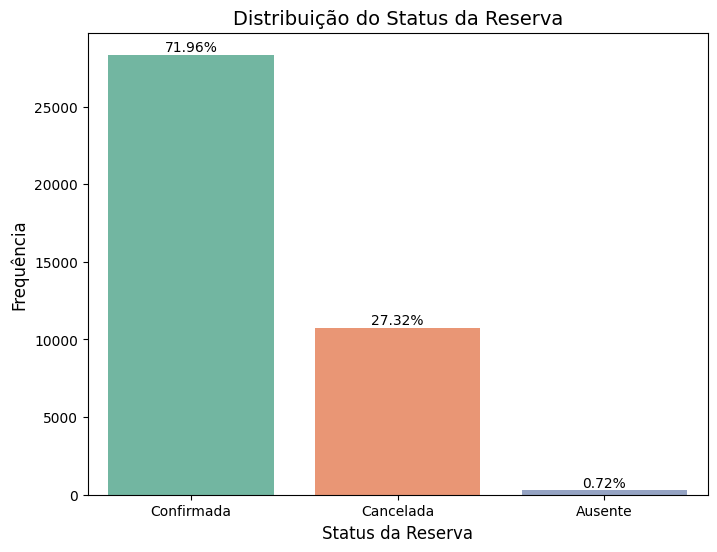

In [60]:
contagem = df_clean['status_reserva'].value_counts()
porcentagens = (contagem / contagem.sum()) * 100
contagem_df = contagem.reset_index()
contagem_df.columns = ['status_reserva', 'frequencia']

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=contagem_df, x='status_reserva', y='frequencia', palette='Set2')

# Adicionando as porcentagens acima das barras
for i, p in enumerate(porcentagens):
    plt.text(i, contagem.iloc[i], f'{p:.2f}%', ha='center', va='bottom')

# Personalização
plt.title('Distribuição do Status da Reserva', fontsize=14)
plt.xlabel('Status da Reserva', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Mostrar o gráfico
plt.savefig('./figuras/dist_status_reserva.png', dpi=300, bbox_inches='tight')
plt.show()

Temos um indicação que mais de 27% da reservas são canceladas. Esse valor corresponde a quanto na receita?

In [21]:
soma_receitas = df_clean.groupby('status_reserva')['receita_por_noite'].sum().reset_index()
soma_receitas['porcentagem'] = (soma_receitas['receita_por_noite'] / soma_receitas['receita_por_noite'].sum()) * 100

soma_receitas

,status_reserva,receita_por_noite,porcentagem
0,Ausente,23019.20,0.609842
1,Cancelada,1150331.15,30.475427
2,Confirmada,2601268.30,68.914731


/tmp/ipykernel_183067/521188577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=soma_receitas, x='status_reserva', y='receita_por_noite', palette='Set2')


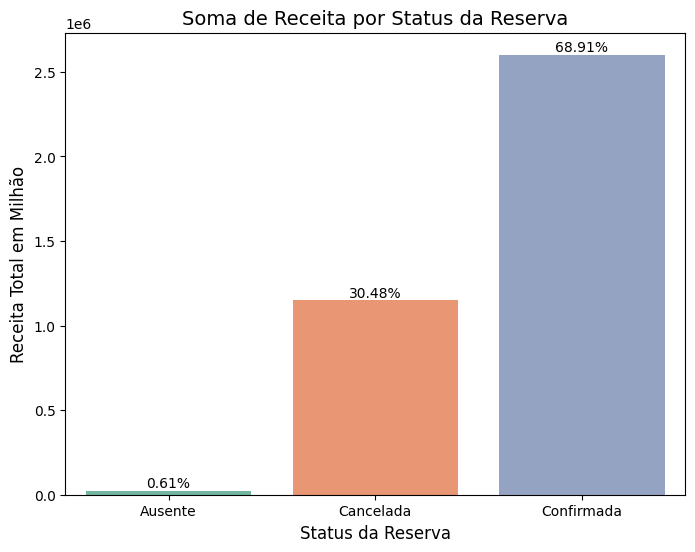

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=soma_receitas, x='status_reserva', y='receita_por_noite', palette='Set2')

# Adicionando as porcentagens acima das barras
for i, row in soma_receitas.iterrows():
    ax.text(i, row['receita_por_noite'], f"{row['porcentagem']:.2f}%", ha='center', va='bottom', fontsize=10)

# Personalização
plt.title('Soma de Receita por Status da Reserva', fontsize=14)
plt.xlabel('Status da Reserva', fontsize=12)
plt.ylabel('Receita Total em Milhão', fontsize=12)

# Mostrar o gráfico
plt.savefig('./figuras/soma_status_reserva.png', dpi=300, bbox_inches='tight')

plt.show()

In [23]:
contagem['Cancelada']

np.int64(10761)

Essas duas análises nos indicam que **10761** hospedagem são **canceladas**, representando um valor **27.32% da rede hoteleira**.\
Também temos que esse número de reservas canceladas representam um total de **1.15 milhão não adquirido na receita**, cerca de **30.48%**.
Esta análise pode nos guiar para os próximos passos.

---
---
---

## 1.1 Relação entre o cancelamento e outras variáveis

Na seção anterior, notamos um alto número de cancelamento das reservas, quase afetando cerca de 30% da rede hoteleira.\
Neste seção temos como objetivo identificar possíveis correlações entre as variáveis do banco de dados.

Sabemos que em períodos de férias muitas pessoas buscam viajar como lazer, este conhecimento geral nos levar a construir\
uma das nossas primeiras hipóteses:

- Existe alguma relação sazonal que afeta a taxa de cancelamento?
- Quais sãos os meses do ano que possuem maior taxa de cancelamento?
- Qual as características do hóspede que realizam o cancelamento?
- Qual o segmento de mercado e agência que possuem o maior número de cancelamentos?

Vamos iniciar filtrando do nosso banco de dados as reservas canceladas  e confirmadas, para tal, realizaremos um agrupamento.

In [24]:
dist_res_can_temporal = df_clean[df_clean['reserva_cancelada'] == 1].groupby('data_chegada', as_index=False)['reserva_cancelada'].sum()
dist_res_book_temporal = df_clean[df_clean['reserva_cancelada'] == 0].groupby('data_chegada', as_index=False)['reserva_cancelada'].count() # Obs.: Como o valor é zero, temos que usar o método count() para contar


print(f"O total de reservas canceladas é {dist_res_can_temporal['reserva_cancelada'].sum()}.")
print(f"O total de reservas confirmadas é {dist_res_book_temporal['reserva_cancelada'].sum()}.")

O total de reservas canceladas é 11044.
O total de reservas confirmadas é 28342.


In [25]:
dist_res_can_temporal_mes = df_clean[df_clean['reserva_cancelada'] == 1].groupby('mes_chegada', as_index=False)['reserva_cancelada'].sum()
dist_res_can_temporal_mes

,mes_chegada,reserva_cancelada
0,1,320
1,2,792
2,3,758
3,4,1048
4,5,1019
5,6,1005
6,7,1427
7,8,1636
8,9,989
9,10,969


In [26]:
dist_res_book_temporal_mes = df_clean[df_clean['reserva_cancelada'] == 0].groupby('mes_chegada', as_index=False)['reserva_cancelada'].count()
dist_res_book_temporal_mes

,mes_chegada,reserva_cancelada
0,1,1801
1,2,2237
2,3,2505
3,4,2501
4,5,2512
5,6,2015
6,7,3101
7,8,3232
8,9,2074
9,10,2509


In [27]:
dist_res_ratio = pd.DataFrame({
    'mes_chegada': range(1, 13),
    'taxa_cancelamento': dist_res_can_temporal_mes['reserva_cancelada'] / dist_res_book_temporal_mes['reserva_cancelada']*100
})
dist_res_ratio

,mes_chegada,taxa_cancelamento
0,1,17.767907
1,2,35.404560
2,3,30.259481
3,4,41.903239
4,5,40.565287
5,6,49.875931
6,7,46.017414
7,8,50.618812
8,9,47.685632
9,10,38.620965


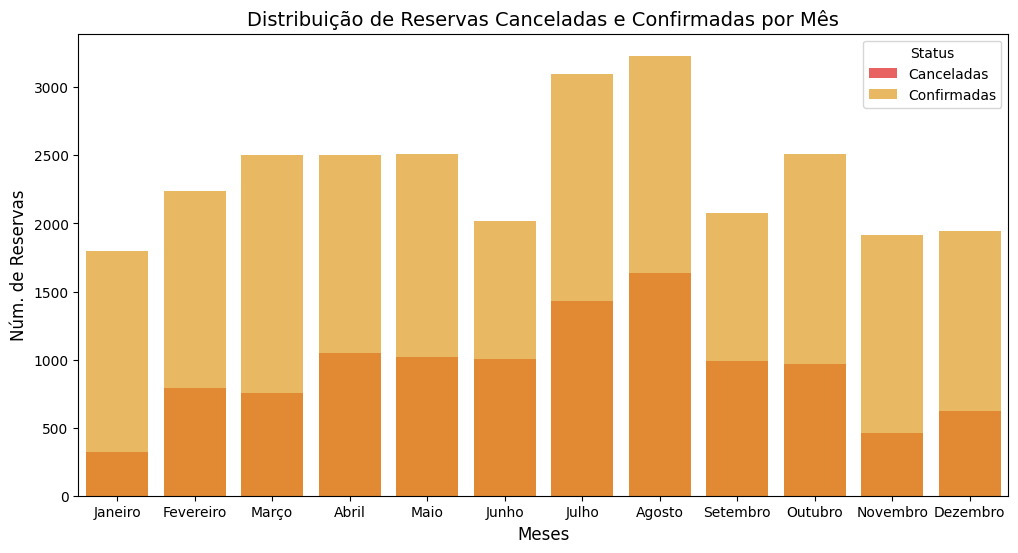

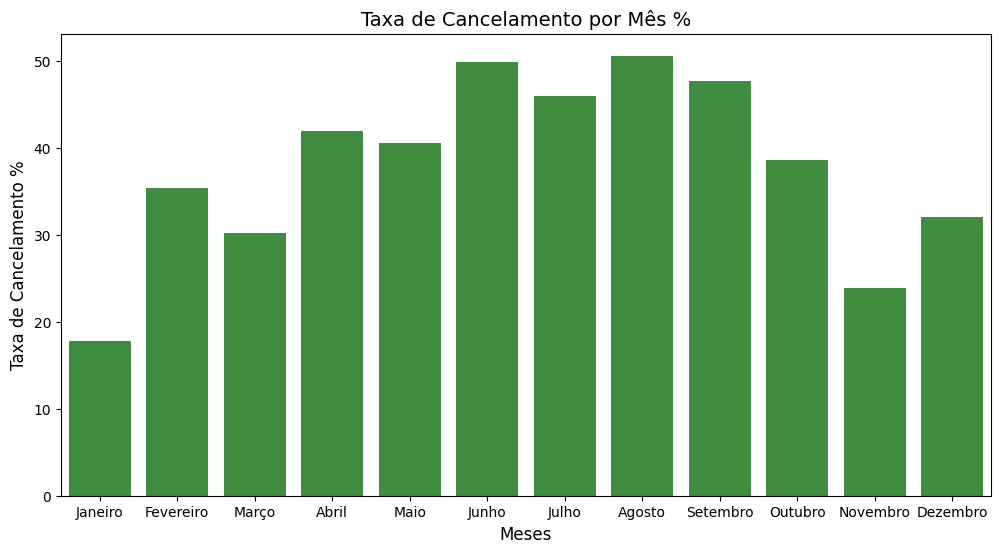

In [62]:
# Calcular a taxa entre canceladas e não canceladas
dist_res_ratio = pd.DataFrame({
    'mes_chegada': range(1, 13),
    'taxa_cancelamento': dist_res_can_temporal_mes['reserva_cancelada'] / dist_res_book_temporal_mes['reserva_cancelada']*100
})

# Gráfico 1: Canceladas e Confirmadas
plt.figure(figsize=(12, 6))
sns.barplot(data=dist_res_can_temporal_mes, x='mes_chegada', y='reserva_cancelada', color='red', alpha=0.7, label='Canceladas')
sns.barplot(data=dist_res_book_temporal_mes, x='mes_chegada', y='reserva_cancelada', color='orange', alpha=0.7, label='Confirmadas')

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
# Personalização do Gráfico 1
plt.title('Distribuição de Reservas Canceladas e Confirmadas por Mês', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Núm. de Reservas', fontsize=12)
plt.xticks(ticks=range(12), labels=meses)
plt.legend(title='Status')
plt.savefig('./figuras/dist_reserva_can_conf_mes.png', dpi=300, bbox_inches='tight')

plt.show()

# Gráfico 2: Taxa de Cancelamento
plt.figure(figsize=(12, 6))
sns.barplot(data=dist_res_ratio, x='mes_chegada', y='taxa_cancelamento', color='green', alpha=0.8)

# Personalização do Gráfico 2
plt.title('Taxa de Cancelamento por Mês %', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Taxa de Cancelamento %', fontsize=12)
plt.xticks(ticks=range(12), labels=meses)
plt.savefig('./figuras/taxa_dist_reserva_can_conf_mes.png', dpi=300, bbox_inches='tight')
plt.show()

Vamos usar o método `seasonal_decompose` da biblioteca `statsmodels`, para analisar a decomposição sazonal

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
filtro_2015_2016 = dist_res_can_temporal[(dist_res_can_temporal['data_chegada']>= '2015-01-01') & (dist_res_can_temporal['data_chegada'] < '2016-01-01')]
filtro_2016_2017 = dist_res_can_temporal[(dist_res_can_temporal['data_chegada']>= '2016-01-01') & (dist_res_can_temporal['data_chegada'] < '2017-01-01')]


In [31]:
filtro_2015_2016 = filtro_2015_2016.set_index('data_chegada')['reserva_cancelada'].asfreq('D', fill_value=0)
filtro_2016_2017 = filtro_2016_2017.set_index('data_chegada')['reserva_cancelada'].asfreq('D', fill_value=0)

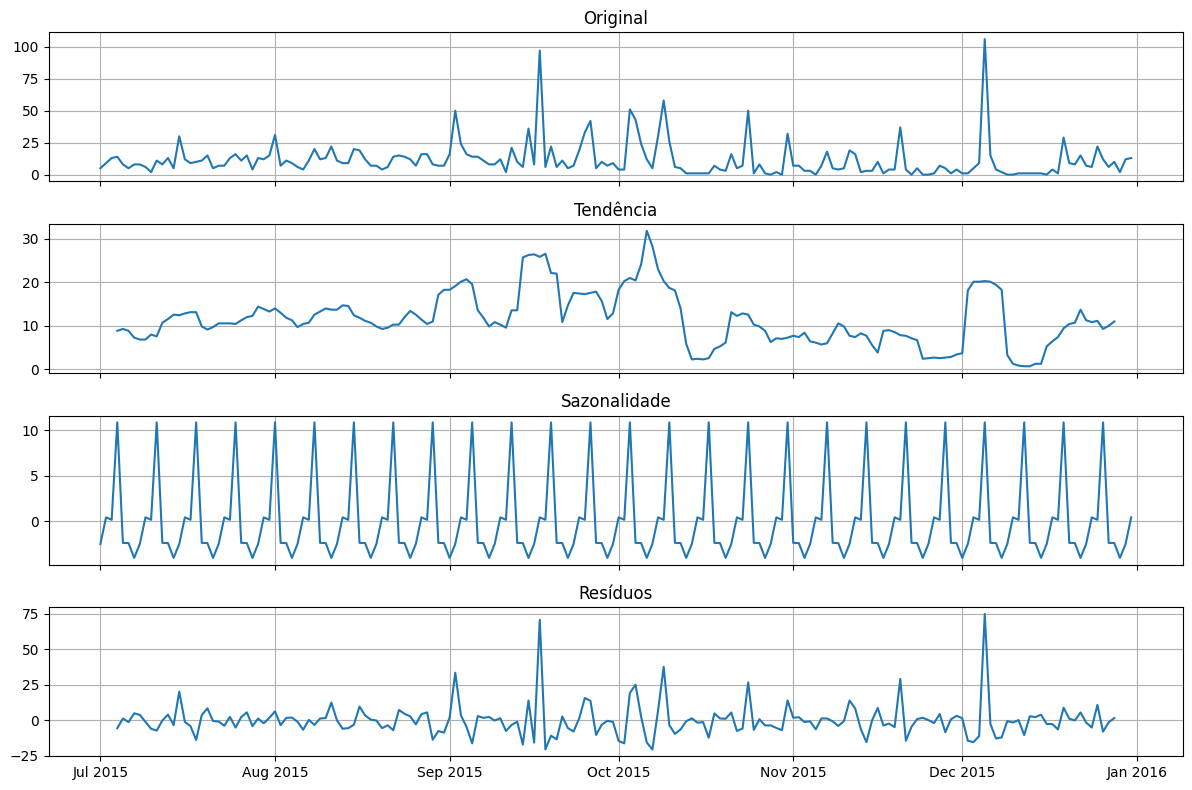

In [32]:
import matplotlib.dates as mdates


# Transformar em série temporal

# Decomposição sazonal
decompose_result = seasonal_decompose(filtro_2015_2016, model='additive')

# Plotando os componentes com rótulos de meses no eixo x
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Componentes
components = [filtro_2015_2016, decompose_result.trend, decompose_result.seasonal, decompose_result.resid]
titles = ['Original', 'Tendência', 'Sazonalidade', 'Resíduos']

for ax, component, title in zip(axes, components, titles):
    ax.plot(component, label=title)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato com meses e anos
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Exibir apenas meses
    ax.grid()

plt.tight_layout()
plt.show()

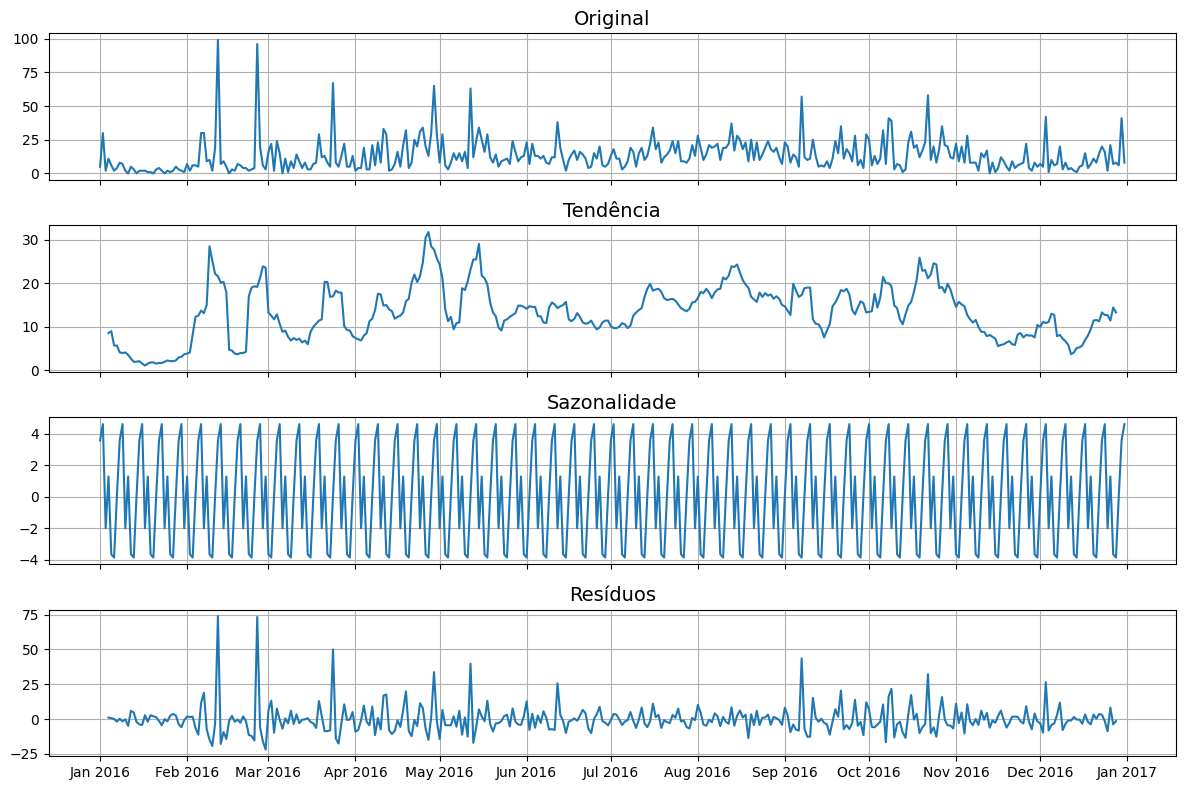

In [33]:
# Decomposição sazonal
decompose_result = seasonal_decompose(filtro_2016_2017, model='additive')

# Plotando os componentes com rótulos de meses no eixo x
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)  # Aumentar tamanho do gráfico

# Componentes
components = [filtro_2016_2017, decompose_result.trend, decompose_result.seasonal, decompose_result.resid]
titles = ['Original', 'Tendência', 'Sazonalidade', 'Resíduos']

for ax, component, title in zip(axes, components, titles):
    ax.plot(component, label=title)
    ax.set_title(title, fontsize=14)  # Ajustar tamanho da fonte do título
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato com meses e anos
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Exibir apenas meses
    ax.grid()

plt.tight_layout()
plt.show()


Após algumas análises da variável de cancelamento, notamos que os meses entre julho e agosto possuem a maior taxa de cancelamento.\
Esta informação é corroborada pela a tendência expressa nos gráficos de sazonalidade que exibe uma tendência de crescimento por volta de Julho e decai\
no inicio do mes de Novembro. 

É importante contextualizar os dados. Nosso banco de dados não possuem contextualização dos lugares que estão os resort, contudo, temos informações\
da origem dos hóspedes. 

O que nos leva a questionar sobre a características desses hospedem.
Vamos identificar de onde vem os hóspedes e quais são aqueles que mais cancelam. Entender suas características pode auxiliar o pessoal de marketing,\
melhor direcionando as campanhas. 

In [34]:
canceladas_por_país = df_clean[(df_clean['reserva_cancelada'] == 1)]['país'].value_counts()
canceladas_soma_menores_50 = canceladas_por_país[canceladas_por_país < 50].sum()
canceladas_por_país_agrupadas = canceladas_por_país[canceladas_por_país >= 50]
canceladas_por_país_agrupadas['Outros'] = canceladas_soma_menores_50

In [35]:
booked_por_país = df_clean[(df_clean['reserva_cancelada'] == 0)]['país'].value_counts()
booked_soma_menores_50 = booked_por_país[booked_por_país < 50].sum()
booked_por_país_agrupadas = booked_por_país[booked_por_país >= 50]
booked_por_país_agrupadas['Outros'] = booked_soma_menores_50

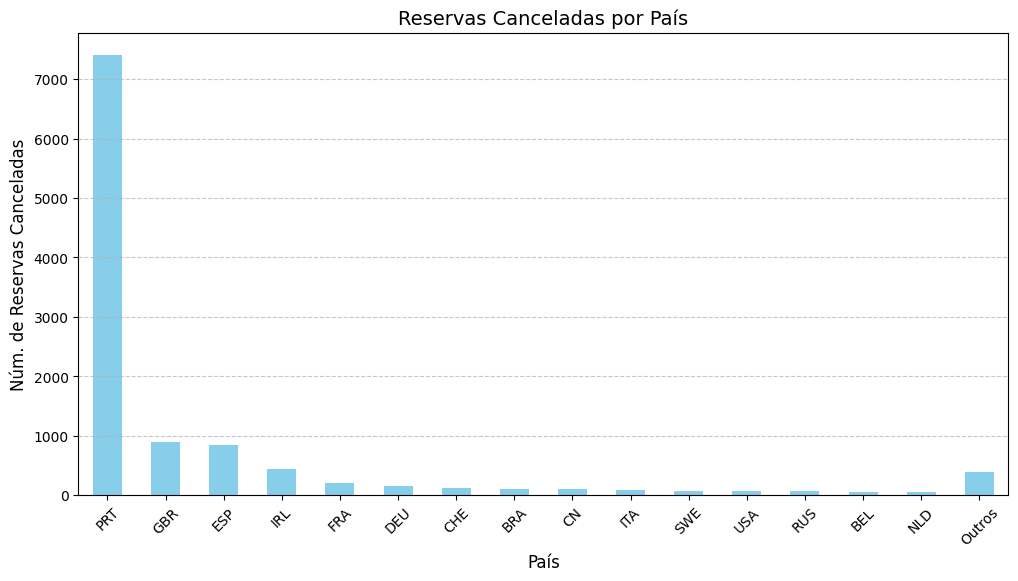

In [63]:

# Plotar diretamente
canceladas_por_país_agrupadas.plot(kind='bar', figsize=(12, 6), color='skyblue')


# Personalizar o gráfico
plt.title('Reservas Canceladas por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Núm. de Reservas Canceladas', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos para legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./figuras/reserva_can_pais.png', dpi=300, bbox_inches='tight')
plt.show()

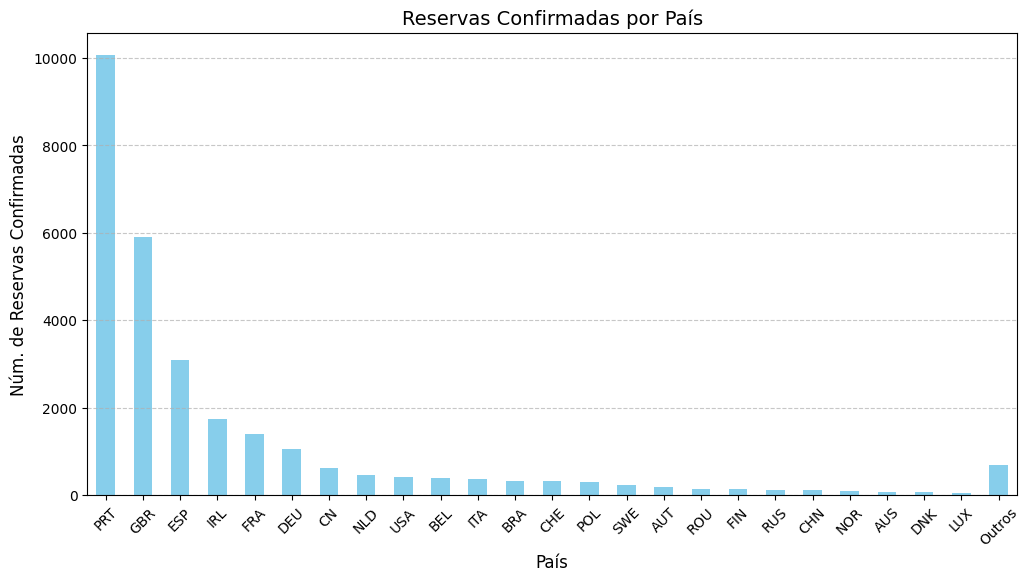

In [64]:

# Plotar diretamente
booked_por_país_agrupadas.plot(kind='bar', figsize=(12, 6), color='skyblue')


# Personalizar o gráfico
plt.title('Reservas Confirmadas por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Núm. de Reservas Confirmadas', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos para legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./figuras/reserva_canfir_pais.png', dpi=300, bbox_inches='tight')

plt.show()

Este dois últimos gráfico nos esclarece muito bem a origem dos hóspedes e quais são os que mais cancelam.\
É possível notar que os hóspedes de Portugal são os que mais possuem reservas tanto confirmadas quanto canceladas.\
Esta informação pode guiar o grupo de marketing a produz uma campanha direcionada aos hóspedes portugueses, com possíveis\
opções que evitando o grande número de cancelamentos. Uma proposta seria ofertar uma opção de crédito ao hospede quando ele\
tentasse cancelar a hospedagem, podendo usar em um outro momento, desta forma, o resort consegue realocar o hospede para uma data\
futura, não perdendo este valor na receita, mas também consegue liberar o quarto para um novo hospede.

Para finalizar esta etapa, podemos questionar qual segmento de mercado tem a maior taxa de cancelamento. Esta informação também\
pode direcionar a diretoria a entender onde o mercado pode estar localizado. 

In [38]:
canceldas_por_seg_merc = df_clean.groupby('segmento_mercado', as_index=False)['reserva_cancelada'].count()
canceldas_por_seg_merc

,segmento_mercado,reserva_cancelada
0,AT Offline,7427
1,AT Online,17655
2,Corporativo,2122
3,Direta,6354
4,Grupos,5828


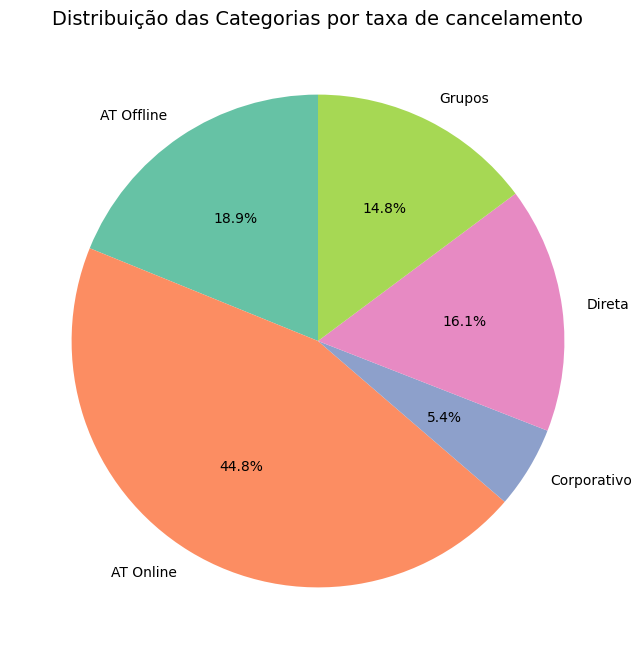

In [65]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
cores_set2 = plt.cm.Set2.colors[:5]
plt.pie(
    canceldas_por_seg_merc['reserva_cancelada'], 
    labels=canceldas_por_seg_merc['segmento_mercado'], 
    autopct='%1.1f%%',  # Formato de porcentagem
    startangle=90,      # Começar o gráfico com 90 graus
    colors=cores_set2  # Cores personalizadas
)

# Adicionar título
plt.title('Distribuição das Categorias por taxa de cancelamento', fontsize=14)
plt.savefig('./figuras/reserva_canc_mercado.png', dpi=300, bbox_inches='tight')

plt.show()

---
---
---

Recapitulando nossas perguntas.

- Existe alguma relação sazonal que afeta a taxa de cancelamento?

    É existe sim sazonalidade, possuindo uma variedade mensal. Mas é possível notar que temos uma tendência de crescimento\
    por volta de agosto e  uma baixa ao longo do meio do ano.

- Quais sãos os meses do ano que possuem maior taxa de cancelamento?

    De Abril à Setembro temos as maiores taxas de cancelamento, passando dos 40% e em contrapartida, Janeiro é o mês com\
    menor taxa de cancelamento, abaixo dos 20%.

- Qual as características do hospede que realizam o cancelamento?

    Os hóspedes que mais cancelam são hóspedes com origem dos países como Portugal, Alemanha, Espanha e Irlanda,
    sendo Portugal o país com o maior número de cancelamentos, superando 7 vezes mais que o segundo país, Alemanha.

- Qual o segmento de mercado e agência que possuem o maior número de cancelamentos?

    O segmento de mercado online possuem a maior taxa de cancelamento, atingindo valores de 44%. Representando quase metade\
    do segmento do mercado, em números de cancelamentos.

---
---
---

## 2) Analisando outras características

Iremos analisar como o preço dos quartos estão distribuídos ao longo dos meses, mas também como estão relacionados com o tipo de quarto.

Para identificamos o valor médio dos quartos, precisamos atualizar o valor da receita, uma vez que nosso banco de dados\
não está levando em consideração a distribuição de adultos e crianças. OBS: Bebes serão desconsiderados.

In [40]:
df_clean['receita_por_noite_atualizada'] = df_clean['receita_por_noite']/ ( df_clean['adultos'] + df_clean['criancas'] )

In [41]:
res_book = df_clean[(df_clean['reserva_cancelada']==0)]
res_book

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva,receita_por_noite_atualizada
5,0,342,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000
6,0,737,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000
7,0,127,2015-07-01,2015,7,1,2,5,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,115.0,94.95,1,Confirmada,2015-07-01,47.475000
8,0,7,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Direta,0,A,Sem pgto,0.0,75.00,0,Confirmada,2015-07-02,75.000000
9,0,13,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Corporativo,0,A,Sem pgto,304.0,75.00,0,Confirmada,2015-07-02,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,0,BB,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07,41.860000
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09,55.400000
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,0,BB,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10,29.916667
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14,56.400000


In [42]:
res_book_mes_noite = res_book.groupby(['mes_chegada'])['receita_por_noite_atualizada'].mean().reset_index()
res_book_mes_noite

,mes_chegada,receita_por_noite_atualizada
0,1,31.286764
1,2,31.015774
2,3,34.271043
3,4,44.025882
4,5,42.389745
5,6,56.600699
6,7,70.428571
7,8,83.490504
8,9,50.293556
9,10,35.313226


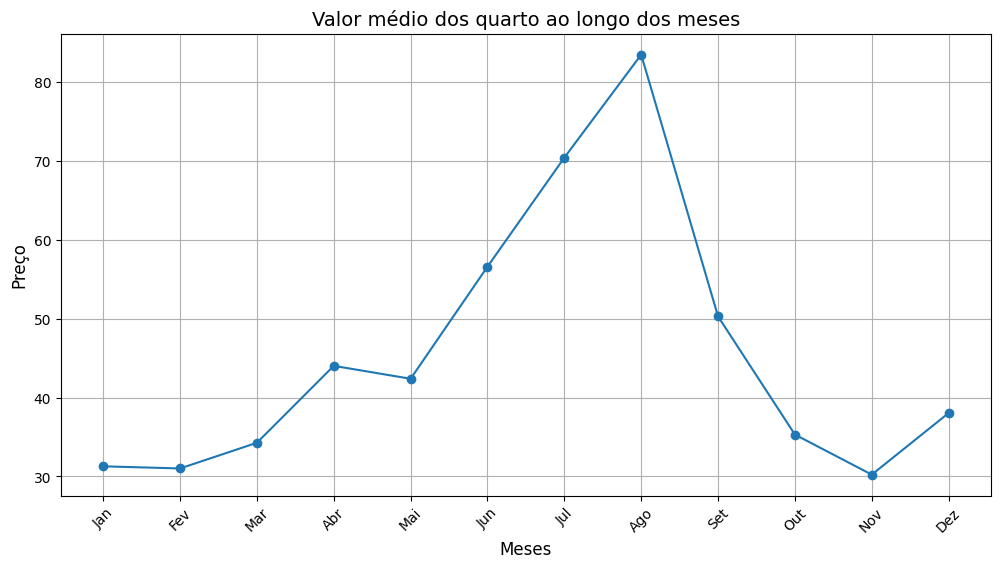

In [67]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotando o gráfico
plt.figure(figsize=(12, 6))

# Traçar os dados
plt.plot('mes_chegada', 'receita_por_noite_atualizada', data=res_book_mes_noite, marker='o')

# Ajustando o eixo X
plt.xticks(ticks=res_book_mes_noite['mes_chegada'], labels=meses, rotation=45)

# Personalização do gráfico
plt.title('Valor médio dos quarto ao longo dos meses', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Preço', fontsize=12)

plt.grid()
plt.savefig('./figuras/preco_quarto_pessoa_noite.png', dpi=300, bbox_inches='tight')

plt.show()

É possível notar que existe um aumento nos preços médios dos quartos entre os meses de Junho à Setembro. Que podem ser justificado pelo\
fato de na Europa nesse período ser Verão.

A próxima verificação é identificar como os valores dos quartos estão distribuídos no tipo do quarto.

In [44]:
res_book

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva,receita_por_noite_atualizada
5,0,342,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000
6,0,737,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000
7,0,127,2015-07-01,2015,7,1,2,5,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,115.0,94.95,1,Confirmada,2015-07-01,47.475000
8,0,7,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Direta,0,A,Sem pgto,0.0,75.00,0,Confirmada,2015-07-02,75.000000
9,0,13,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Corporativo,0,A,Sem pgto,304.0,75.00,0,Confirmada,2015-07-02,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,0,BB,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07,41.860000
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09,55.400000
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,0,BB,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10,29.916667
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14,56.400000


In [45]:
dist_quartos_preco = res_book[['tipo_quarto', 'receita_por_noite_atualizada']].sort_values('tipo_quarto')
dist_quartos_preco


,tipo_quarto,receita_por_noite_atualizada
39858,A,49.53
28516,A,29.20
28514,A,27.50
28513,A,17.28
28512,A,17.00
...,...,...
25263,H,21.75
511,L,37.50
1606,L,100.00
1572,L,86.00


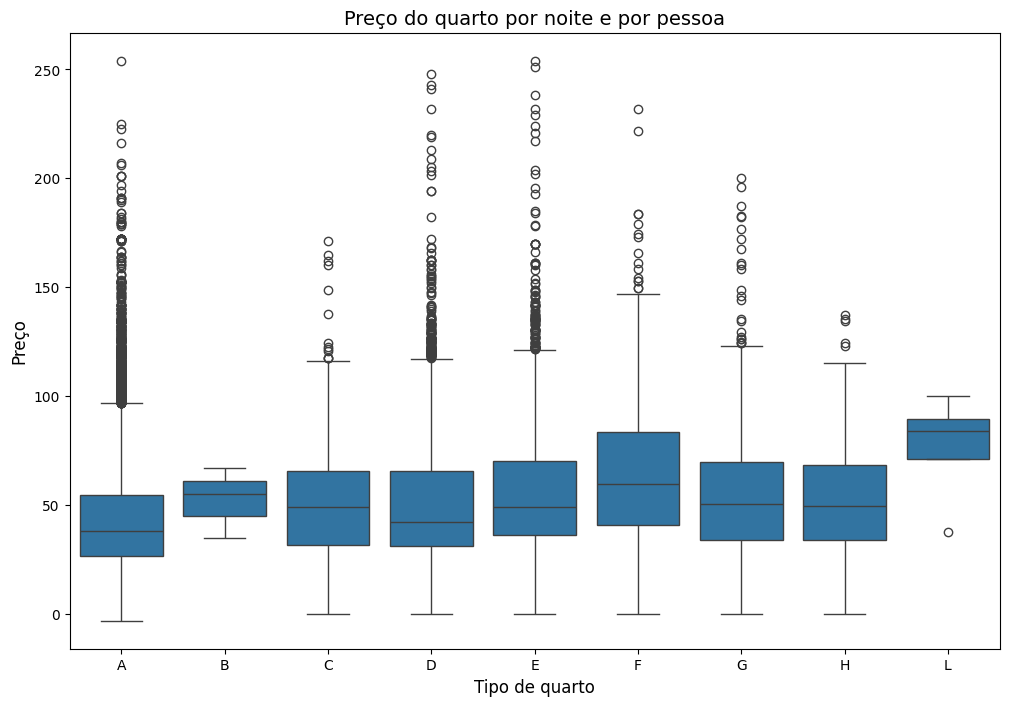

In [68]:
plt.figure(figsize=(12,8))
sns.boxplot(x='tipo_quarto', y='receita_por_noite_atualizada', data=dist_quartos_preco)

# Personalização do gráfico
plt.title('Preço do quarto por noite e por pessoa', fontsize=14)
plt.xlabel('Tipo de quarto', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.savefig('./figuras/preco_tipo_quarto_noite.png', dpi=300, bbox_inches='tight')

plt.show()


Nesta análise podemos identificar os valores médios por noite e por pessoa. Notemos que alguns quartos possuem valores discrepantes\
quando comparados com a média, esses valores são os outliers, que inicialmente poderiam ser removidos na análise de dados.
Contudo, esta análise nos mostra o comportamento do preço dos quartos indicando que a média está abaixo de 100 reais e acima de 30 reais.\
Esta informação pode direciona o setor financeiro na cobrança dos quartos. 

Nossa próxima aná lise é identificar quanto tempo os hóspedes ficam no resort.

Para realizar está análise, iremos precisar dos hóspedes validos, e somar o total de noites, considerando dias da semana e final de semana.

In [47]:
res_book['total_noite'] = res_book['nro_noites_fds'] + res_book['nro_noites_dds']
res_book

/tmp/ipykernel_183067/962066825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_book['total_noite'] = res_book['nro_noites_fds'] + res_book['nro_noites_dds']


,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva,receita_por_noite_atualizada,total_noite
5,0,342,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0
6,0,737,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0
7,0,127,2015-07-01,2015,7,1,2,5,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,115.0,94.95,1,Confirmada,2015-07-01,47.475000,7
8,0,7,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Direta,0,A,Sem pgto,0.0,75.00,0,Confirmada,2015-07-02,75.000000,1
9,0,13,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Corporativo,0,A,Sem pgto,304.0,75.00,0,Confirmada,2015-07-02,75.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,0,BB,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07,41.860000,7
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09,55.400000,9
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,0,BB,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10,29.916667,10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14,56.400000,14


Note que temos hóspedes que não ocupam nenhuma noite. Esses hóspedes são validos? Infelizmente não.\
Muitas vezes notamos que alguns dados precisam ser corrigidos ao longo das análises, quando nos aprofundamos.

In [48]:
res_book[['reserva_cancelada','total_noite','adultos','criancas', 'bebes']]

,reserva_cancelada,total_noite,adultos,criancas,bebes
5,0,0,2,0,0
6,0,0,2,0,0
7,0,7,2,0,0
8,0,1,1,0,0
9,0,1,1,0,0
...,...,...,...,...,...
39854,0,7,2,1,0
39855,0,9,2,0,0
39856,0,10,2,1,0
39857,0,14,2,0,0


In [49]:
tempo_hosped = res_book.groupby(['total_noite'])['reserva_cancelada'].agg('count').reset_index()
tempo_hosped

,total_noite,reserva_cancelada
0,0,366
1,1,6309
2,2,4298
3,3,3785
4,4,3300
5,5,1883
6,6,1198
7,7,4423
8,8,504
9,9,405


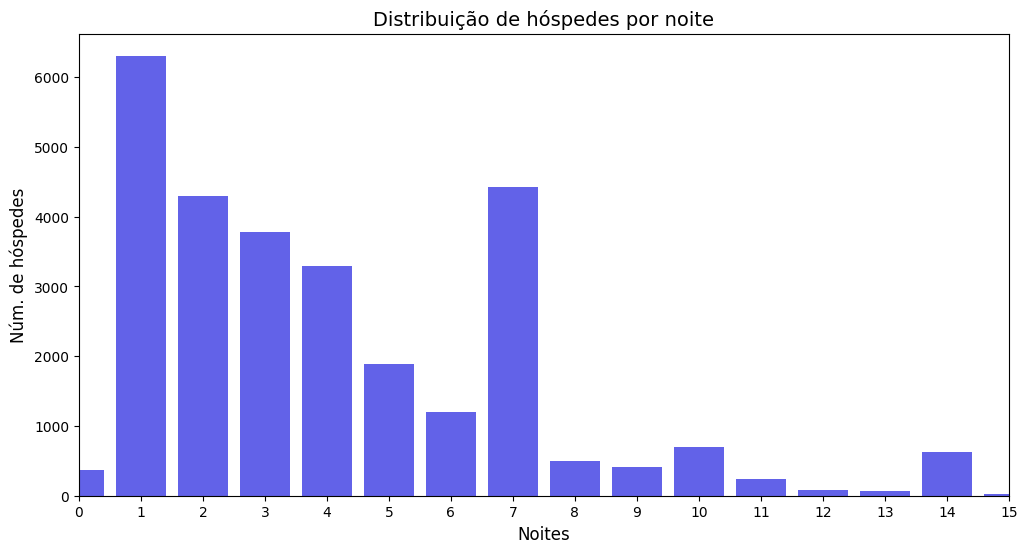

In [69]:
# Gráfico 1: Canceladas e Confirmadas
plt.figure(figsize=(12, 6))
sns.barplot(data=tempo_hosped, x='total_noite', y='reserva_cancelada', color='blue', alpha=0.7)

# Personalização do Gráfico 1
plt.title('Distribuição de hóspedes por noite', fontsize=14)
plt.xlabel('Noites', fontsize=12)
plt.ylabel('Núm. de hóspedes', fontsize=12)
plt.xlim(0,15)
plt.savefig('./figuras/distri_hospede_noite.png', dpi=300, bbox_inches='tight')

plt.show()

Contudo podemos nos questionar qual o tipo de hospede que passa mais ou menos tempos, se possui ou não crianças ou bebes.
Vamos atualizar a quantidade de crianças, e criar uma variável True ou False para tem ou não criança.

In [51]:
res_book['criancas_update'] = res_book['criancas'] + res_book['bebes']
res_book

/tmp/ipykernel_183067/2788169920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_book['criancas_update'] = res_book['criancas'] + res_book['bebes']


,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva,receita_por_noite_atualizada,total_noite,criancas_update
5,0,342,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0,0
6,0,737,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0,0
7,0,127,2015-07-01,2015,7,1,2,5,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,115.0,94.95,1,Confirmada,2015-07-01,47.475000,7,0
8,0,7,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Direta,0,A,Sem pgto,0.0,75.00,0,Confirmada,2015-07-02,75.000000,1,0
9,0,13,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Corporativo,0,A,Sem pgto,304.0,75.00,0,Confirmada,2015-07-02,75.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,0,BB,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07,41.860000,7,1
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09,55.400000,9,0
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,0,BB,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10,29.916667,10,1
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14,56.400000,14,0


In [52]:
res_book['crianca_T_F'] = res_book['criancas_update'] != 0 
res_book

/tmp/ipykernel_183067/1058367991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_book['crianca_T_F'] = res_book['criancas_update'] != 0


,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,alimentacao,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva,receita_por_noite_atualizada,total_noite,criancas_update,crianca_T_F
5,0,342,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0,0,False
6,0,737,2015-07-01,2015,7,1,0,0,2,0,0,BB,PRT,Direta,0,C,Sem pgto,0.0,0.00,0,Confirmada,2015-07-01,0.000000,0,0,False
7,0,127,2015-07-01,2015,7,1,2,5,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,115.0,94.95,1,Confirmada,2015-07-01,47.475000,7,0,False
8,0,7,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Direta,0,A,Sem pgto,0.0,75.00,0,Confirmada,2015-07-02,75.000000,1,0,False
9,0,13,2015-07-01,2015,7,1,0,1,1,0,0,BB,GBR,Corporativo,0,A,Sem pgto,304.0,75.00,0,Confirmada,2015-07-02,75.000000,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,0,BB,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07,41.860000,7,1,True
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09,55.400000,9,0,False
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,0,BB,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10,29.916667,10,1,True
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,0,HB,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14,56.400000,14,0,False


In [53]:
df_relacao_crianca_estadia = res_book[['reserva_cancelada','total_noite','adultos','criancas_update','crianca_T_F']]
df_relacao_crianca_estadia

,reserva_cancelada,total_noite,adultos,criancas_update,crianca_T_F
5,0,0,2,0,False
6,0,0,2,0,False
7,0,7,2,0,False
8,0,1,1,0,False
9,0,1,1,0,False
...,...,...,...,...,...
39854,0,7,2,1,True
39855,0,9,2,0,False
39856,0,10,2,1,True
39857,0,14,2,0,False


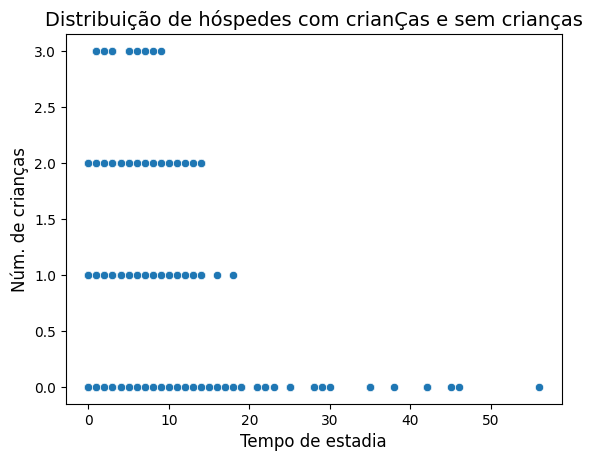

In [70]:
sns.scatterplot(x ='total_noite', y='criancas_update', data=df_relacao_crianca_estadia)
# Personalização do Gráfico 1
plt.title('Distribuição de hóspedes com crianÇas e sem crianças', fontsize=14)
plt.xlabel('Tempo de estadia', fontsize=12)
plt.ylabel('Núm. de crianças', fontsize=12)
plt.savefig('./figuras/distri_hospede_noite_com_ou_sem_crianca.png', dpi=300, bbox_inches='tight')

plt.show()

Podemos notar que pessoas que não possuem crianças permanecem por mais dias. Uma opção para aumentar o número de estadias\
para pessoas que possuem crianças é direcionar hospedagens que possuem atividades para crianças, assim atraindo estes\
hóspedes a ficarem mais tempo. 

---
---
---

Recapitulando nossas perguntas.

- Qual o tempo de hospedagem?;
    Notamos que mais de 7000 hóspedes passam apenas uma noite decaindo até 6 noites. 7 noites volta a ser um valor significando,\
    talvez este valor esteja associado a promoções para reservas de uma semana, mas é preciso verificar com mais detalhes.
- Também foi feita uma análise dos preços dos quartos:
    - Temos um aumento no preços dos quartos entre Julho e Setembro, sendo o pico em Agosto. Este aumento pode está relacionado\
    com o verão europeu, indicando que neste período muitos hóspedes buscam fazer viagens que pode ser confirmado pelo fato que\
    Portugal é país com o maior número de hospedagens.
    - Os valores dos quartos relacionados pela tipagem estão entre 100 e 25 reais. Notamos que existem valores outliers que podem ser excluídos.
- Relação entre tempo de estadia e o número de crianças.
    - O maior número de estádias está associados a pessoas que não possuem crianças. Uma alternativa para o aumento da estadias de pessoas\
    com crianças é indicar resort que possuem atividades direcionadas para crianças. 

---
---
---

## 3) Sumarização dos principais resultados/impactos. 

Após esta análise com base no banco de dados, algumas sugestões que podem serem colocadas em práticas:

1. Reduzir Cancelamentos:

    - Foco em mercados internacionais: 
    Implementar políticas específicas para países como Portugal e Alemanha, como reservas flexíveis ou descontos para remarcação.
    - Segmento online: Estabelecer medidas para fidelizar clientes do segmento online, como taxas de cancelamento reduzidas para
    clientes recorrentes ou descontos para reservas antecipadas.

2. Promover Reservas em Baixa Temporada:

    - Desenvolver campanhas promocionais para os meses de baixa ocupação (janeiro a março) para equilibrar a sazonalidade.
    Oferecer descontos progressivos para estadas mais longas nesse período.

3. Aumentar Atração de Famílias com Crianças:

    - Criar pacotes promocionais para famílias, incluindo atividades voltadas para crianças, como parques aquáticos, eventos recreativos e serviços de babá.
    - Divulgar o resort como um destino "família-friendly"
    
4. Aproveitar o Verão Europeu:
    - Capitalizar a alta demanda de julho a setembro com estratégias de precificação dinâmica para maximizar a receita.
    - Oferecer pacotes semanais atrativos, alinhados ao padrão observado para estadas de 7 noites.

5. Revisar Outliers nos Preços:

    - Excluir ou investigar os valores fora do padrão para garantir consistência nos dados e melhorar a análise de preços.
    - Reavaliar a estratégia de precificação para categorias de quartos mais caras.

6. Otimizar Experiência para Clientes Online:
    - Integrar experiências exclusivas para reservas feitas por canais online, como upgrades ou serviços adicionais para clientes fidelizados.

